In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = './processed_data.csv'
df = pd.read_csv(file_path)
df.head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,...,amenities_Wheelchair accessible,amenities_Wide clearance to bed,amenities_Wide clearance to shower,amenities_Wide doorway,amenities_Wide entryway,amenities_Wide hallway clearance,amenities_Wifi,amenities_Window guards,amenities_toilet,price
0,0.0625,0.014925,0.083333,0.06250,0.002,0.001400,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0
1,0.2500,0.009950,0.166667,0.06250,0.003,0.001900,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,160.0
2,0.0625,0.009950,0.083333,0.03125,0.000,0.099920,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0
3,0.1250,0.009950,0.083333,0.03125,0.013,0.005901,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,125.0
4,0.0625,0.009950,0.083333,0.03125,0.001,0.072915,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150.0


In [ ]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Hyperparameter Tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform Grid Search with cross-validation for Decision Tree
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_dt_model = grid_search.best_estimator_

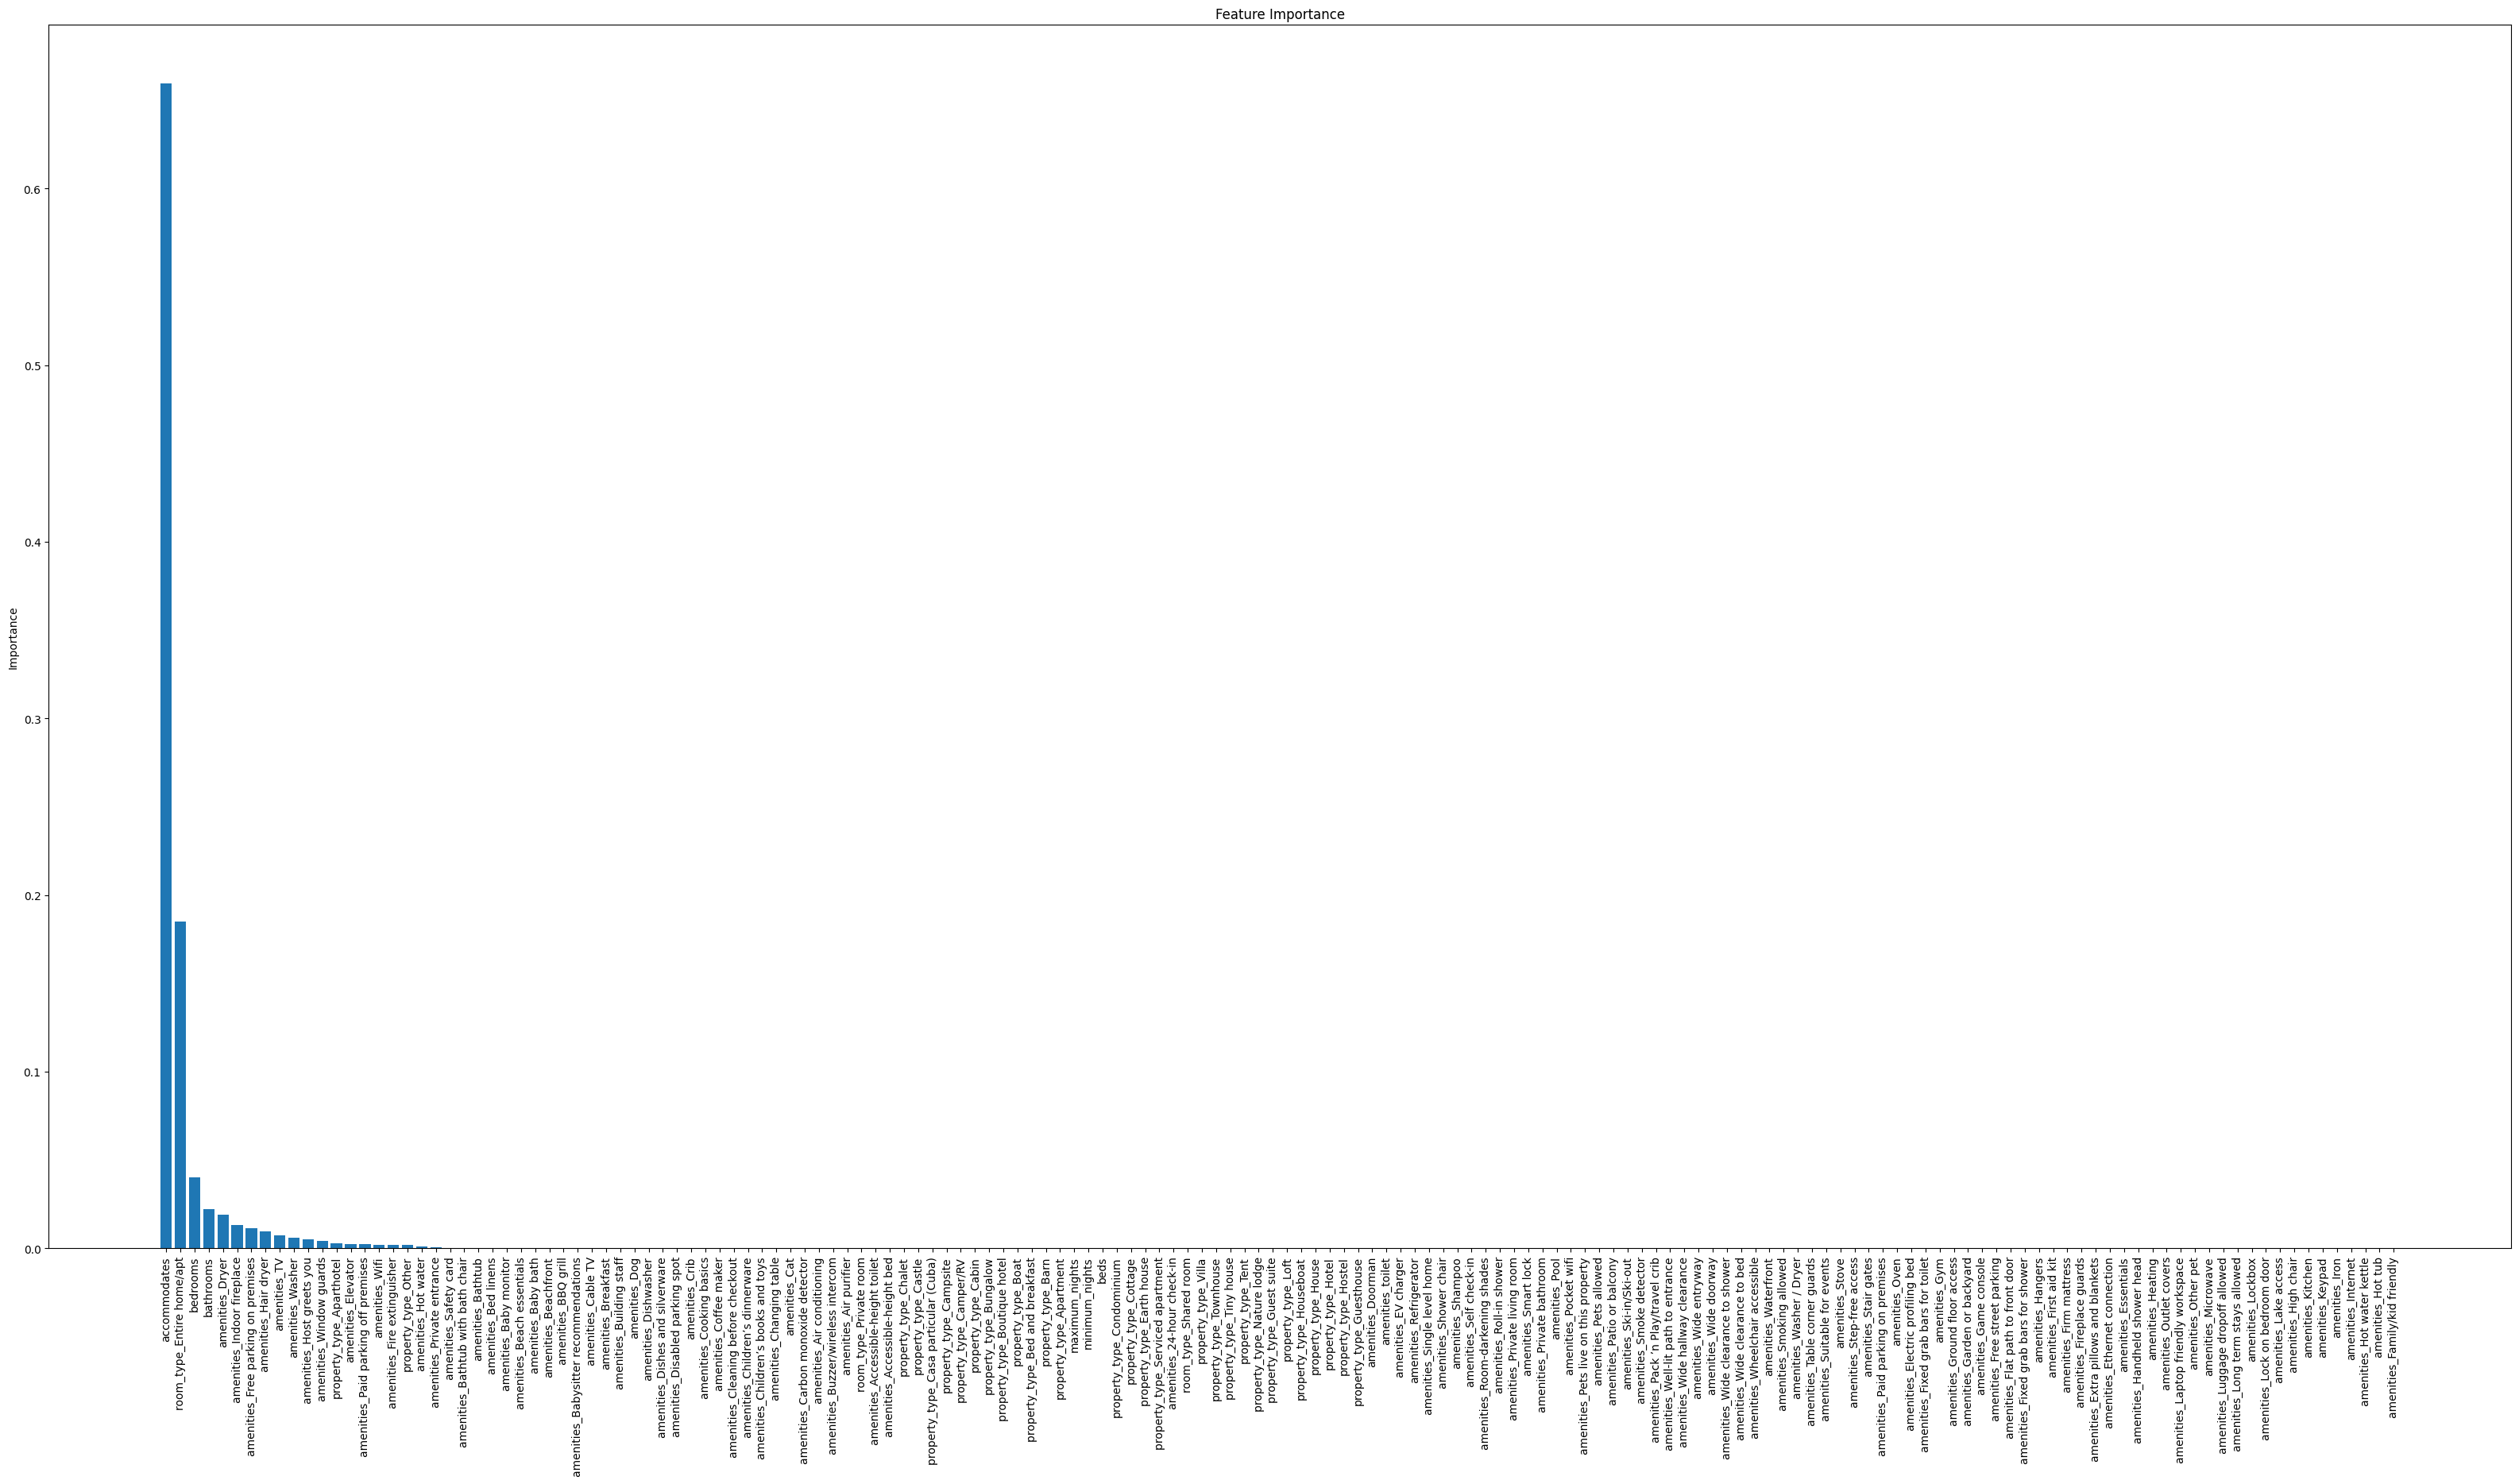

In [ ]:
# Feature Importance Plot
importances = best_dt_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(40, 20))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.ylabel("Importance")
plt.show()

In [ ]:
# Feature Selection
X = df[feature_names[importances > 0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()

,accommodates,bathrooms,bedrooms,property_type_Aparthotel,property_type_Other,room_type_Entire home/apt,amenities_Dryer,amenities_Elevator,amenities_Fire extinguisher,amenities_Free parking on premises,...,amenities_Host greets you,amenities_Hot water,amenities_Indoor fireplace,amenities_Paid parking off premises,amenities_Private entrance,amenities_Safety card,amenities_TV,amenities_Washer,amenities_Wifi,amenities_Window guards
0,0.0625,0.014925,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1,0.2500,0.009950,0.166667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0625,0.009950,0.083333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.1250,0.009950,0.083333,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0625,0.009950,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
best_dt_model = DecisionTreeRegressor(**best_dt_model.get_params())
best_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=20, random_state=42)

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Calculate the average RMSE from cross-validation
cv_rmse = (-cv_scores.mean()) ** 0.5
print(f"Cross-validated RMSE: {cv_rmse:.2f}")

Cross-validated RMSE: 42.40


In [ ]:
|# Predict prices using the tuned model
y_pred_best = best_dt_model.predict(X_test)

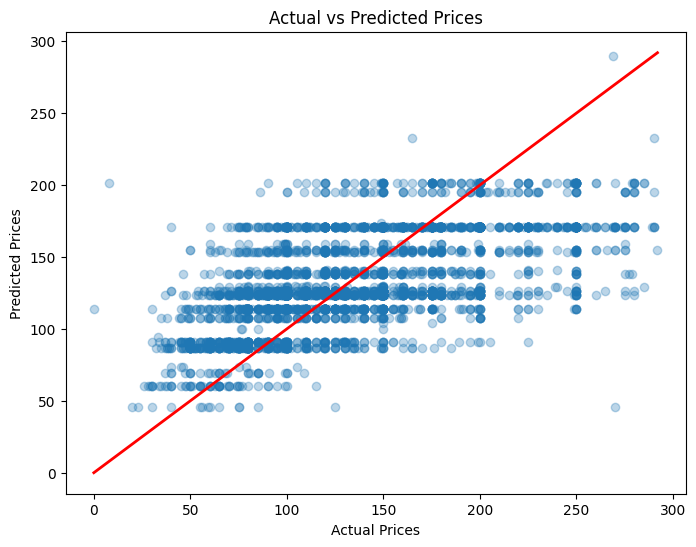

In [ ]:
# Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
# Evaluate the model using various metrics
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best ** 0.5
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the evaluation metrics
print(f"Best Decision Tree RMSE with tuning: {rmse_best:.2f}")
print(f"Best Decision Tree MAE with tuning: {mae_best:.2f}")
print(f"Best Decision Tree R² Score with tuning: {r2_best:.2f}")

Best Decision Tree RMSE with tuning: 42.20
Best Decision Tree MAE with tuning: 32.88
Best Decision Tree R² Score with tuning: 0.35


In [ ]:
# Fitting a Linear Regressor
from sklearn.linear_model import LinearRegression

# Linear Regression Model
lr_model = LinearRegression()

# Fit the Linear Regression model
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict prices using the Linear Regression model
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Evaluate the Linear Regression model using various metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics for the Linear Regression model
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.2f}")

Linear Regression RMSE: 41.90
Linear Regression MAE: 32.22
Linear Regression R² Score: 0.36


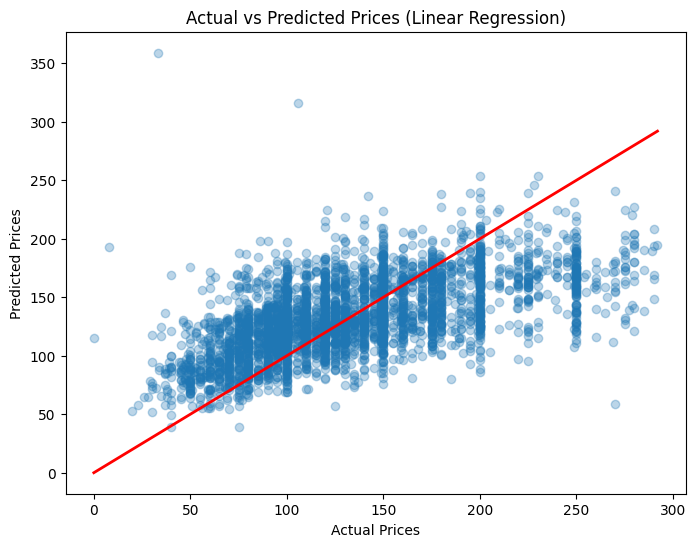

In [ ]:
# Actual vs Predicted Prices (Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()